# Load the dataframe

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [11]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [15]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns

In [18]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [20]:
df["   TG"]

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [22]:
df[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# Simple statistics and filtering

In [30]:
df.loc[df['   TG'] != -9999]['   TG'].mean()/10

6.360787526128467

In [32]:
df.loc[df['   TG'] != -9999]['   TG'].max()/10

26.2

In [34]:
df.loc[df['   TG'] != -9999]['   TG'].min()/10

-28.8

<Axes: >

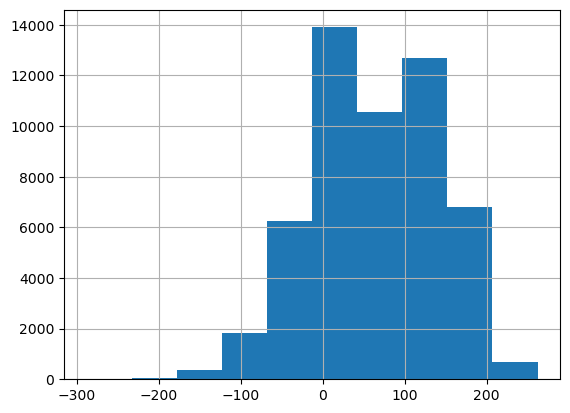

In [42]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get certain cells

In [47]:
df.loc[df['    DATE'] == "1860-01-05"]['   TG'].squeeze() / 10

3.1

In [49]:
df.loc[df['   TG'] == df['   TG'].max()]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,0


In [53]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [55]:
df.loc[3, '   TG']

37

# Calculate a new column out of existing column

In [70]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG']==-9999, np.nan)

In [72]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Farenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82,NaN


In [74]:
df["TG"] = df['TG0']/10

In [76]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Farenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,-1767.82,NaN


In [78]:
df["Farenheit"] = df["TG"] * (9/5) + 32

In [80]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Farenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: >

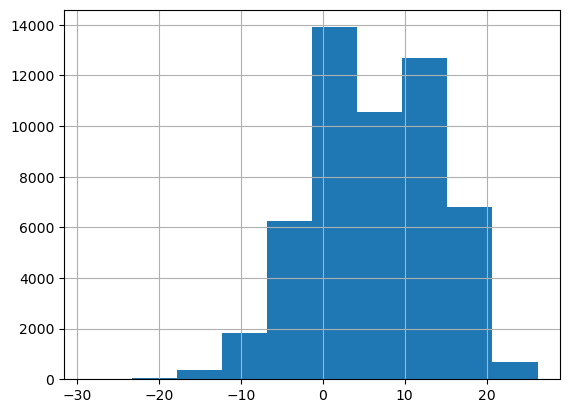

In [83]:
df["TG"].hist()

In [ ]:
df.plot(x=df[])